In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/02


In [2]:
input_file = rt.TFile("../online/output/MassOut.root")
input_list = input_file.Get("h-lambda")
c = rt.TCanvas("main")

In [3]:
single_dist = input_list.FindObject("fLambdaDist")
triggered_single_dist = input_list.FindObject("fTriggeredLambdaDist")

cor_dist = input_list.FindObject("fDphiHLambda")
ls_cor_dist = input_list.FindObject("fDphiHLambdaLS")

In [4]:
single_dist.GetAxis(0).SetRangeUser(2, 4)
triggered_single_dist.GetAxis(0).SetRangeUser(2, 4)

In [5]:
mass_dist = single_dist.Projection(3).Clone("mass_dist")
triggered_mass_dist = triggered_single_dist.Projection(3).Clone("triggered_mass_dist")

In [6]:
mass_dist.Sumw2()
mass_dist.SetTitle("Single-particle #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
mass_dist.GetXaxis().SetTitle("Mass (GeV)")
mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
mass_dist.SetLineColor(rt.kBlue)

In [7]:
triggered_mass_dist.Sumw2()
triggered_mass_dist.SetTitle("Triggered #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
triggered_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
triggered_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
triggered_mass_dist.SetLineColor(rt.kRed)

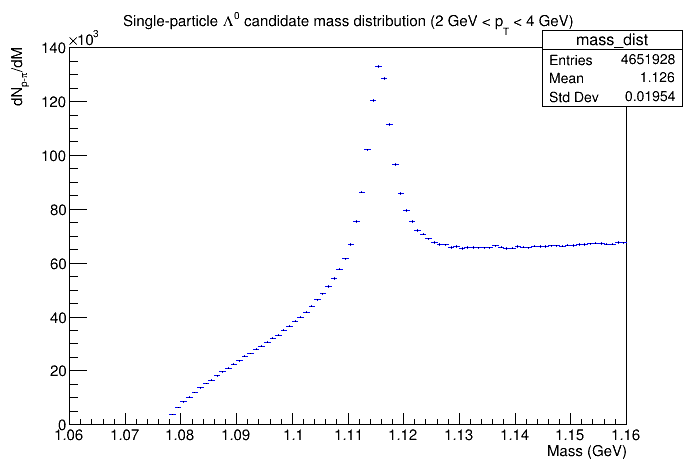

In [8]:
mass_dist.Draw()
c.Draw()

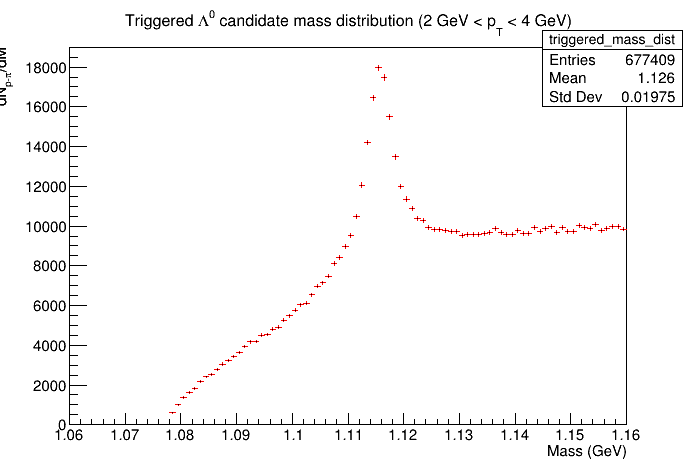

In [9]:
triggered_mass_dist.Draw()
c.Draw()

In [84]:
mass_dist.Rebin(2)

<ROOT.TH1D object ("mass_dist") at 0x60cad40>

In [85]:
# g_fit = rt.TF1("g_fit", "gaus(0) + pol3(3)", 1.1, 1.14)
g_fit = rt.TF1("g_fit", "gaus(0) + pol2(3)", 1.09, 1.15)
full_g_fit = rt.TF1("g_fit", "gaus(0) + pol4(3)", 1.08, 1.16)
v_fit = rt.TF1("v_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

In [86]:
g_fit.SetNpx(1000)
g_fit.FixParameter(0, 2*78000)
g_fit.SetParameter(1, 1.115)
g_fit.SetParameter(2, 0.002)
g_fit.SetParameter(3, 2*-20173773.00)
g_fit.SetParameter(4, 2*35431340.00)
g_fit.SetParameter(5, 2*-15506000.00)

In [87]:
mass_dist.Fit(g_fit, "RS")

 FCN=8385.15 FROM HESSE     STATUS=NOT POSDEF     31 CALLS         287 TOTAL
                     EDM=4.67965e-11    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.56000e+05     fixed    
   2  p1           1.11570e+00   7.28257e-06   2.66003e-07   1.16655e+00
   3  p2           2.58434e-03   6.61946e-06   1.06890e-08  -6.10496e-01
   4  p3          -5.52495e+07   8.15292e+02   1.31725e+01   2.40466e-08
   5  p4           9.74677e+07   7.75068e+02   2.32381e+01   2.61980e-08
   6  p5          -4.28817e+07   6.55229e+02   1.02238e+01   2.85051e-08


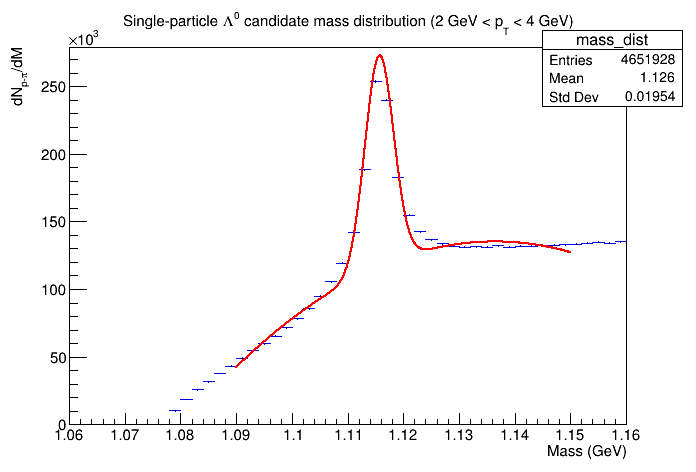

In [88]:
mass_dist.Draw()
g_fit.Draw("SAME")
c.Draw()

In [49]:
full_g_fit.SetParameter(0, g_fit.GetParameter(0))
full_g_fit.SetParameter(1, g_fit.GetParameter(1))
full_g_fit.SetParameter(2, g_fit.GetParameter(2))
full_g_fit.SetParameter(3, g_fit.GetParameter(3))
full_g_fit.SetParameter(4, g_fit.GetParameter(4))
full_g_fit.SetParameter(5, g_fit.GetParameter(5))
full_g_fit.SetParameter(6, g_fit.GetParameter(6))
full_g_fit.SetParameter(7, g_fit.GetParameter(7))

Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)


In [71]:
bin_1 = mass_dist.FindBin(1.09)
bin_2 = mass_dist.FindBin(1.10)
bin_3 = mass_dist.FindBin(1.14)

print(mass_dist.GetBinContent(bin_1))
print(mass_dist.GetBinContent(bin_2))
print(mass_dist.GetBinContent(bin_3))

23709.0
38441.0
65583.0


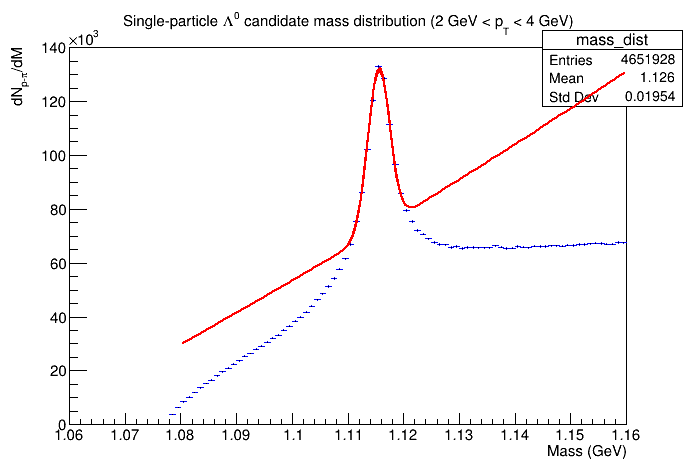

In [140]:
mass_dist.Draw()
full_g_fit.Draw("SAME")
c.Draw()